In [30]:
%matplotlib inline
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import math
import matplotlib.pyplot as plt
import numpy as np
torch.cuda.set_device(0)
torch.set_default_tensor_type('torch.cuda.FloatTensor')
torch.__version__

'1.1.0'

In [31]:
N = 1000

In [32]:
x = torch.linspace(0,2*math.pi,N)
# x

In [33]:
y = torch.sin(x)
# y

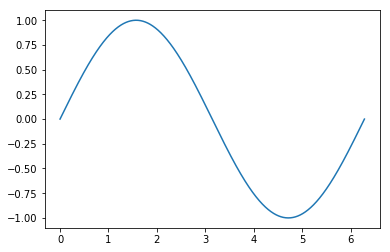

In [34]:
plt.plot(np.array(x.cpu()), np.array(y.cpu()))

In [35]:
dataset = TensorDataset(x,y)
# dataset

In [36]:
dl = DataLoader(dataset, batch_size=32, shuffle=True)
# dl

In [37]:
# for xi,yi in dl:
#     print(xi, yi)

In [38]:
class Linear(nn.Module):
    def __init__(self, hidd=32):
        super().__init__()
        self.main = nn.Sequential(
            nn.BatchNorm1d(1),
            nn.Linear(in_features=1, out_features=hidd),
            nn.ReLU(),
            nn.BatchNorm1d(hidd),
            nn.Linear(hidd, hidd),
            nn.ReLU(),
            nn.BatchNorm1d(hidd),
            nn.Linear(hidd, 1)
        )
    
    def forward(self,x):
        return self.main(x)

In [39]:
model = Linear()
model.cuda()
optimizer = optim.Adam(model.parameters(), lr=5e-4)

In [40]:
def vis():
    with torch.no_grad():
        yh = model(x.unsqueeze(1)).squeeze(1).cpu()
        plt.plot(np.array(x.cpu()), np.array(yh), np.array(x.cpu()), np.array(y.cpu()))
        plt.show()

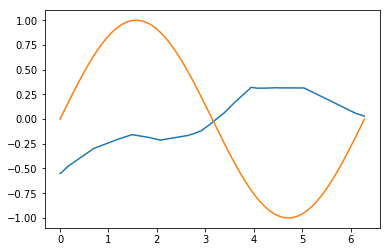

tensor([14.0395], grad_fn=<AddBackward0>)


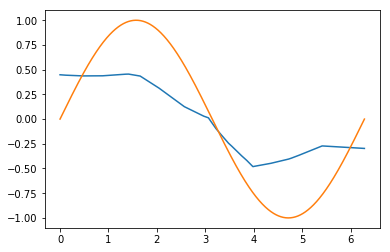

tensor([4.1234], grad_fn=<AddBackward0>)


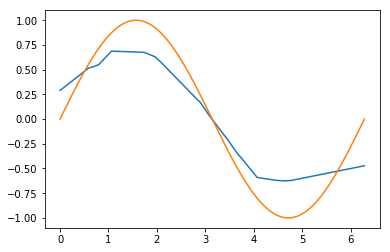

tensor([2.6050], grad_fn=<AddBackward0>)


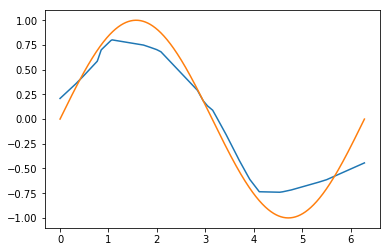

tensor([2.2140], grad_fn=<AddBackward0>)


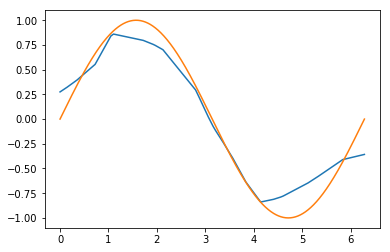

tensor([1.5418], grad_fn=<AddBackward0>)


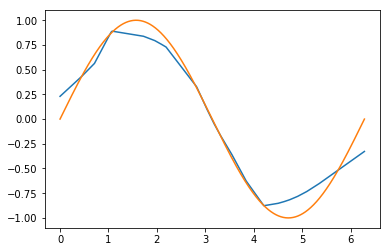

tensor([2.2103], grad_fn=<AddBackward0>)


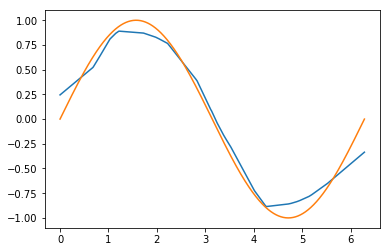

tensor([2.2977], grad_fn=<AddBackward0>)


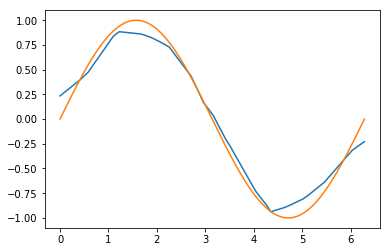

tensor([1.8217], grad_fn=<AddBackward0>)


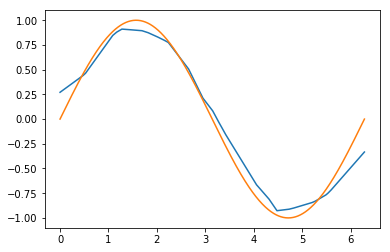

tensor([2.1084], grad_fn=<AddBackward0>)


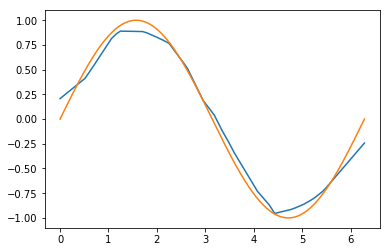

tensor([1.7208], grad_fn=<AddBackward0>)


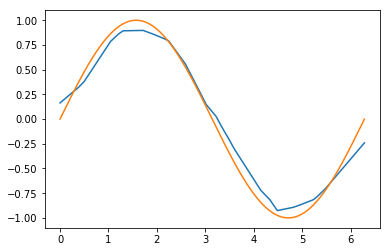

tensor([1.3639], grad_fn=<AddBackward0>)


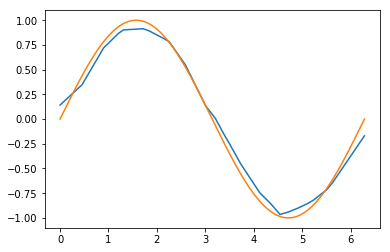

tensor([1.1505], grad_fn=<AddBackward0>)


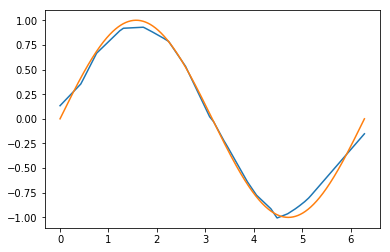

tensor([1.4531], grad_fn=<AddBackward0>)


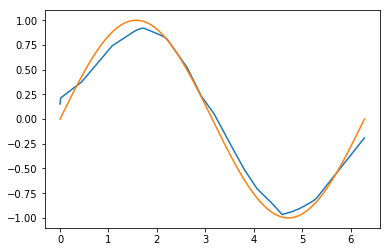

tensor([2.0396], grad_fn=<AddBackward0>)


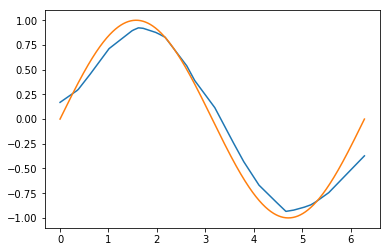

tensor([1.6521], grad_fn=<AddBackward0>)


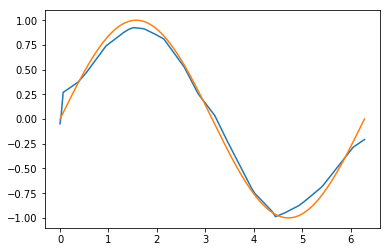

tensor([1.3229], grad_fn=<AddBackward0>)


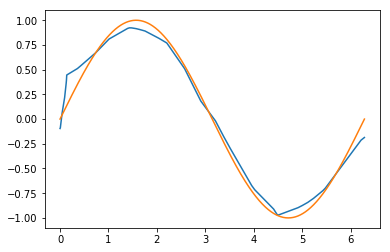

tensor([1.3318], grad_fn=<AddBackward0>)


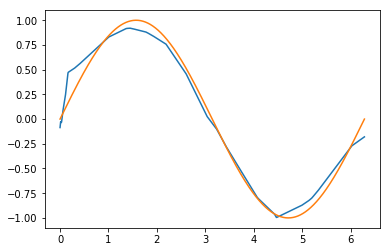

tensor([2.1673], grad_fn=<AddBackward0>)


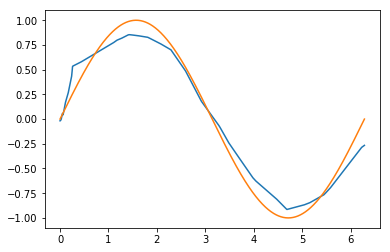

tensor([1.4413], grad_fn=<AddBackward0>)


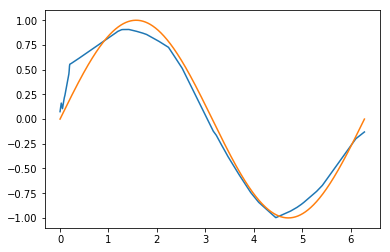

tensor([1.2481], grad_fn=<AddBackward0>)


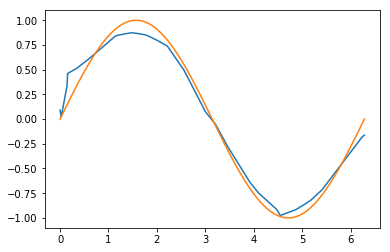

tensor([1.6109], grad_fn=<AddBackward0>)


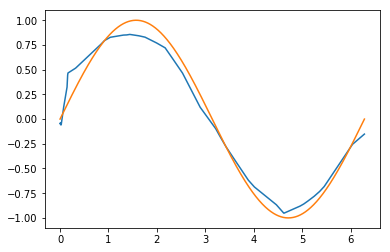

tensor([1.3827], grad_fn=<AddBackward0>)


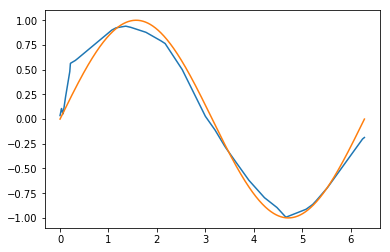

tensor([1.5065], grad_fn=<AddBackward0>)


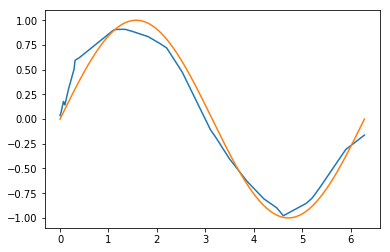

tensor([1.3592], grad_fn=<AddBackward0>)


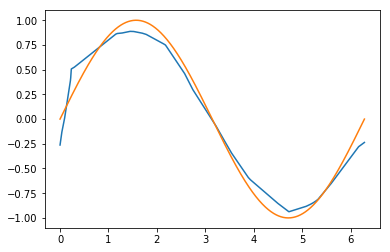

tensor([1.5550], grad_fn=<AddBackward0>)


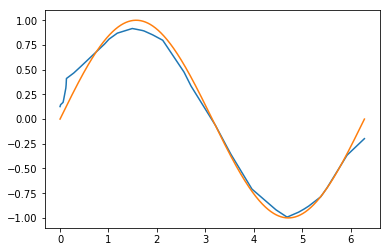

tensor([1.9184], grad_fn=<AddBackward0>)


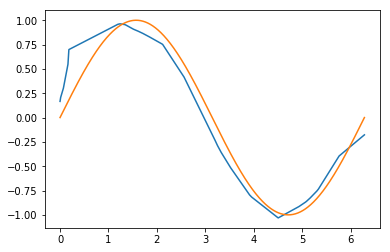

tensor([1.4377], grad_fn=<AddBackward0>)


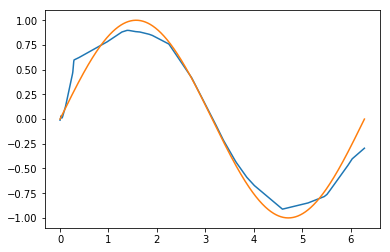

tensor([1.2333], grad_fn=<AddBackward0>)


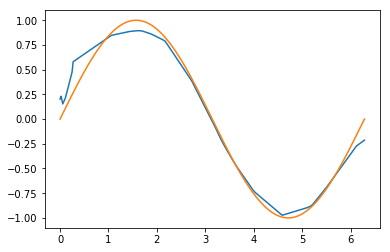

tensor([1.2404], grad_fn=<AddBackward0>)


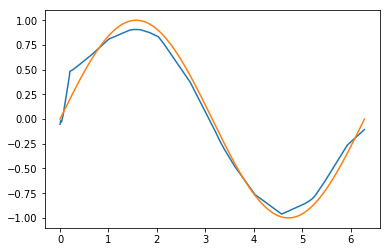

tensor([1.1488], grad_fn=<AddBackward0>)


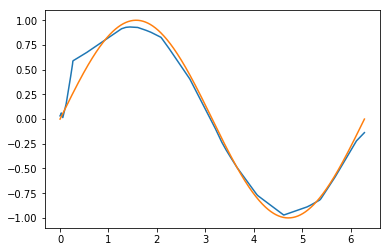

tensor([0.9117], grad_fn=<AddBackward0>)


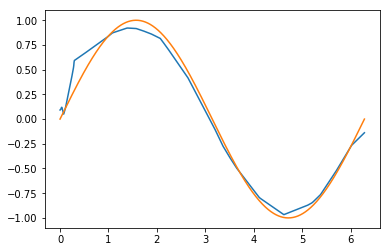

tensor([0.9914], grad_fn=<AddBackward0>)


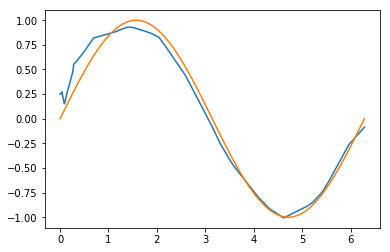

tensor([1.2881], grad_fn=<AddBackward0>)


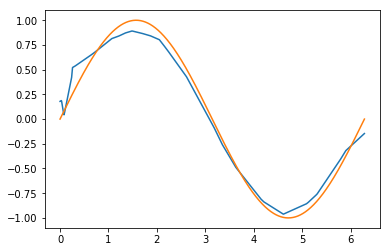

tensor([1.7060], grad_fn=<AddBackward0>)


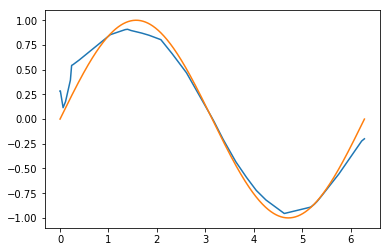

tensor([1.4790], grad_fn=<AddBackward0>)


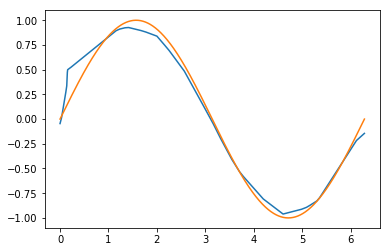

tensor([1.3571], grad_fn=<AddBackward0>)


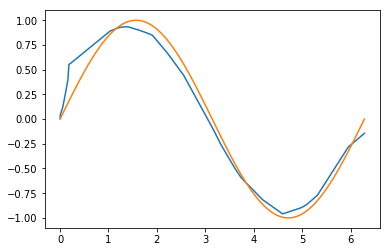

tensor([1.1142], grad_fn=<AddBackward0>)


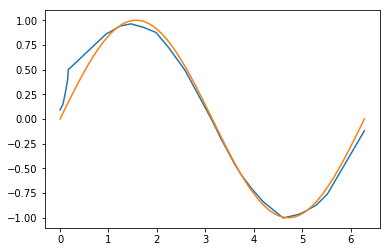

tensor([1.6538], grad_fn=<AddBackward0>)


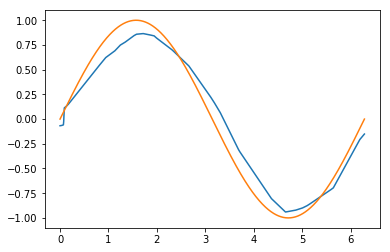

tensor([1.1765], grad_fn=<AddBackward0>)


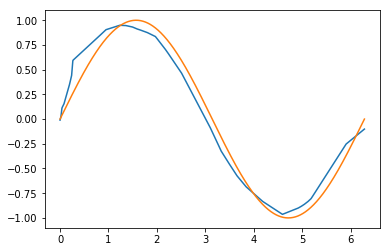

tensor([1.1795], grad_fn=<AddBackward0>)


In [41]:
epochs = 40
for _ in range(epochs):
    sum_loss = torch.zeros(1)
    vis()
    for xi,yi in dl:
        yh = model(xi.unsqueeze(1))
#         print("xi", xi)
#         print("yh", yh)
#         print("yi", yi.unsqueeze(1))
        loss = ((yh-yi.unsqueeze(1))**2).mean()
        sum_loss += loss
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(sum_loss)